# Exploratory Data Analysis. Stroke prediction.

This is the first notebook of the stroke prediction problem. Here we are focusing on getting to know the data, identifiying missing values and outliers and doing the EDA.

# Conclusion of the EDA
* **Missing data**: Two columns have missing values: bmi and smoking_status. The data is missing completely at random for them. In the modeling part, we will come up with imputation techniques for these columns
* **Outliers**: Some patients have extremely high body mass index. However, these values are possible for a person to have. Therefore, we preserved them. These patients haven't had stroke issues
* **Imbalance**: The target variable is highly imbalanced. Only 5% of patients have had stroke. We will address this issue in the modeling part
* **Feature association**: 
    * Age: There is a strong association between age and the likelihood of having a stroke, with nearly all stroke cases occurring in individuals over 30 years old. This suggests that age is a significant predictor for stroke.
    * Hypertension and Heart Disease: The presence of hypertension and heart disease is associated with an increased likelihood of having a stroke.
    * BMI and Glucose Levels: Higher BMI and average glucose levels are correlated with an increased risk of stroke, although the association is not as strong. Some individuals with extreme values for these features have not experienced a stroke.
    * Gender and Smoking Status: There appears to be no significant association between gender and stroke incidence, nor between smoking habits and stroke. It is important to note that there are over 1,000 missing values for the smoking_status feature, which may impact the analysis

## Dataset overview
**Number of observations**: 5110

**Number of features**: 12

**Attributes**:
  * id: unique identifier of each person
  * gender
  * age
  * hypertension: medical condition in which the blood pressure is elevated
  * heart disease: binary variable indicating whether the patient has a heart disease
  * ever_married
  * work_type
  * Residence_type
  * avg_glucose_level
  * bmi: body mass index
  * smoking_status
  * stroke: indicates whether a patient has had stroke. It has to be noted that our dataset is highly imbalanced. Only 5% of patients have had stroke.
  
**Target population**: In the source of the dataset, the target population is not indicated. For educational purposes, let's assume it's general adult population.

## First look into the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import scipy.stats as stats 
import sys
import os
sys.path.append(os.path.abspath('..'))
from utils import helper_functions

In [2]:
stroke_data = pd.read_csv("../dataset/healthcare-dataset-stroke-data.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_data.shape

(5110, 12)

In [4]:
len(stroke_data["id"].unique())

5110

No duplicated id values

In [5]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are some missing values in "bmi" column

In [6]:
missing_bmi = stroke_data[stroke_data["bmi"].isnull()]
missing_bmi.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1


In [7]:
print(missing_bmi["gender"].unique())
print(missing_bmi["work_type"].unique())
print(missing_bmi["smoking_status"].unique())

['Female' 'Male']
['Self-employed' 'Private' 'Govt_job' 'children']
['never smoked' 'Unknown' 'formerly smoked' 'smokes']


We see that "bmi" is missing for patients of different genres, work types, residence types, etc. It seems that the data is missing completely at random. However, to assure that, we will analyze the distributions in EDA.

Check for misspelling:

In [8]:
cat_columns = ["gender", "hypertension", "heart_disease", 
               "ever_married", "Residence_type", "stroke",
               "smoking_status", "work_type"]
for column in cat_columns:
    print(f"{column}: {stroke_data[column].unique()}")

gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
Residence_type: ['Urban' 'Rural']
stroke: [1 0]
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


There is "Unknown" value in smoking_status column. In the dataset description it was stated that the data is missing for the patients. We will address the issue of this missing value later.

One patient in the dataset has "Other" as their gender. We will drop this row to make EDA more easier.

In [9]:
stroke_data = stroke_data[stroke_data["gender"] != "Other"]

In [10]:
num_columns = ["age", "avg_glucose_level", "bmi"]
stroke_data[num_columns].describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,4908.00000
mean,43.229986,106.140399,28.89456
std,22.613575,45.285004,7.85432
min,0.080000,55.120000,10.30000
25%,25.000000,77.240000,23.50000
50%,45.000000,91.880000,28.10000
75%,61.000000,114.090000,33.10000
max,82.000000,271.740000,97.60000


* Age: No entries that have to be dropped. We have patients of all ages, including infants and elderly people
* Avg_glucose_level, bmi: there seem to be some extreme values, but they are possible for people to have.

## Train-test split

Before splitting into training and testing datasets, let's check the distribution of our target variable

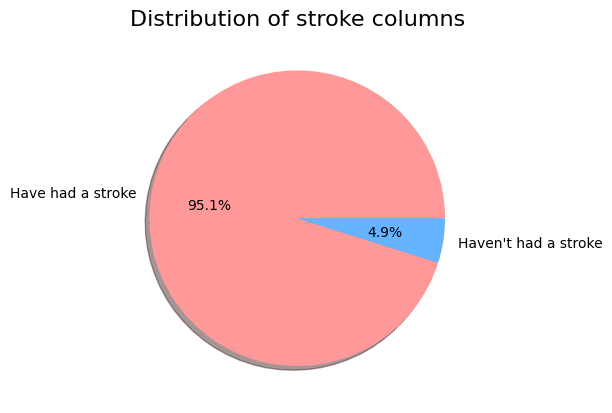

In [11]:
stroke_count = stroke_data["stroke"].value_counts()
plt.pie(stroke_count, shadow=True, 
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'],
       labels=["Have had a stroke", "Haven't had a stroke"])
plt.title("Distribution of stroke columns", fontsize=16);

In [12]:
train_set, test_set = train_test_split(stroke_data, random_state=0, 
                                       test_size=0.2,
                                       stratify=stroke_data["stroke"])

In [13]:
train_set["stroke"].value_counts(normalize=True)

0    0.951309
1    0.048691
Name: stroke, dtype: float64

In [14]:
test_set["stroke"].value_counts(normalize=True)

0    0.951076
1    0.048924
Name: stroke, dtype: float64

In [15]:
pd.merge(train_set, test_set, on=list(train_set.columns), how="inner")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


## Exploratory Data Analysis

#### Univariate analysis:

Let's analyze categorical columns:
   * gender
   * hypertension
   * heart_disease
   * ever_married
   * work_type
   * Residence_type
   * smoking_status
   * stoke

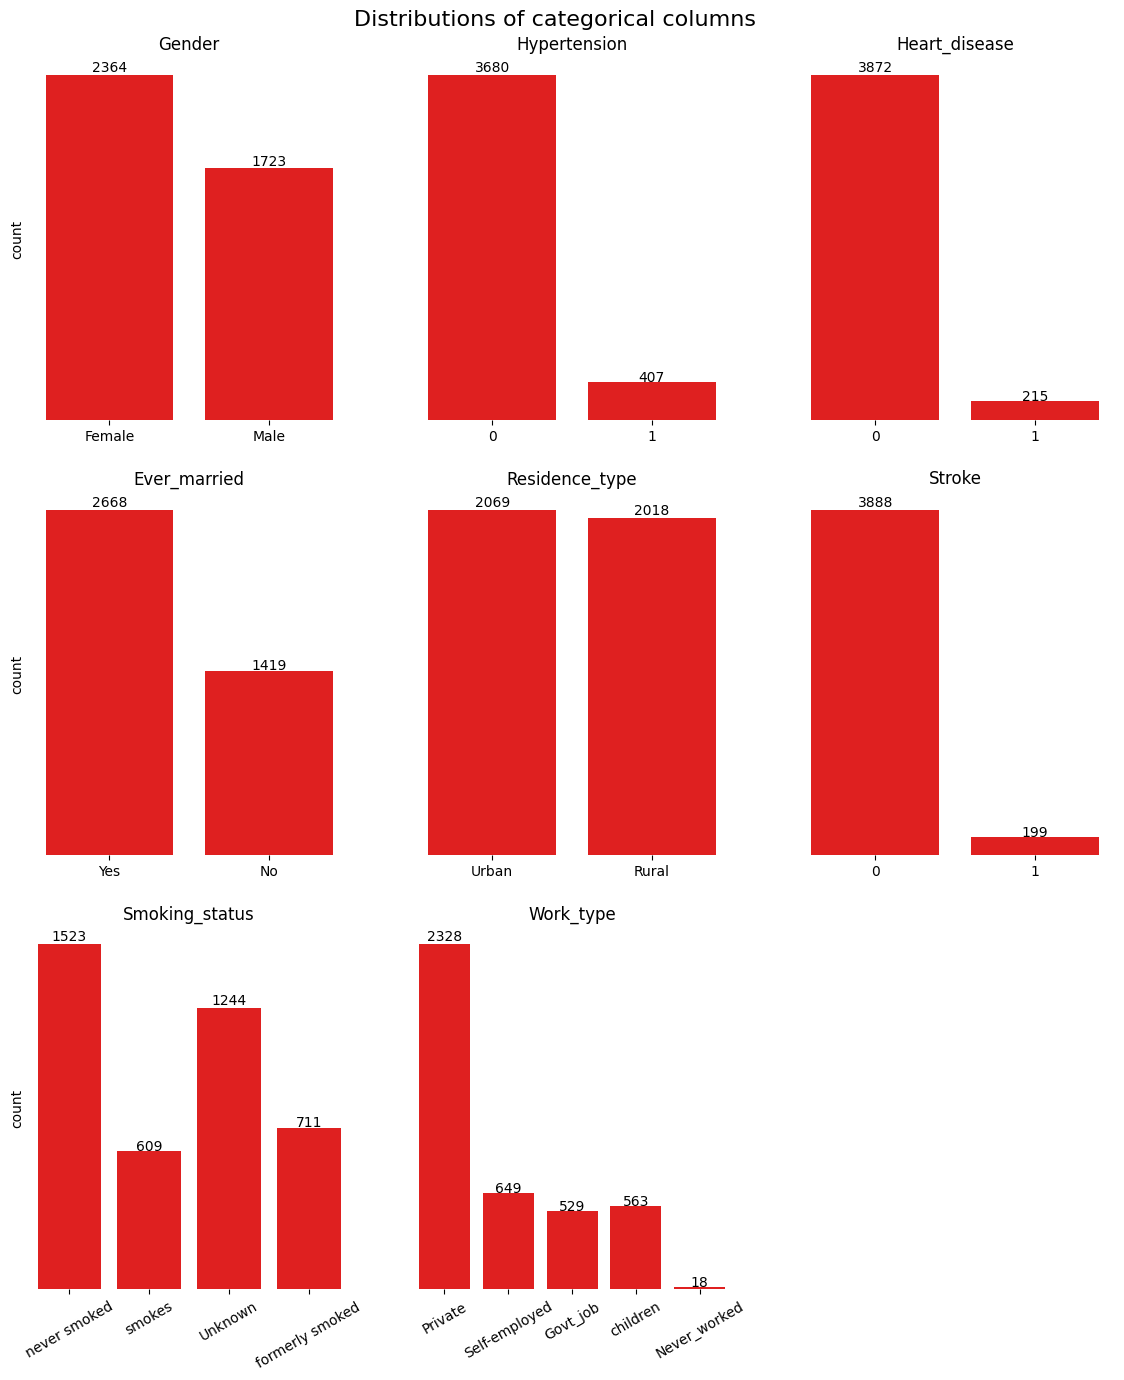

In [16]:
helper_functions.plot_cat_columns(train_set, cat_columns, 
                                  "Distributions of categorical columns",
                                  figsize=(14, 16))

Our dataset consists of bigger number of females. Minority of individuals have ever experienced hypertension or heart disease (fewer than 500 out of 4000). Approximately 2700 people have been married, while 1500 have never been married. The dataset is almost evenly split between urban and rural residents. Regarding smoking status, the majority have never smoked, and there is a significant number of patients for whom smoking status information is unavailable. Latly, most people are have private work_type. Only 18 patients have never worked and similar number of people are either self-employed, children or have government jobs.

Now, let's move to numerical columns:
  * age
  * average glucose level
  * body mass index

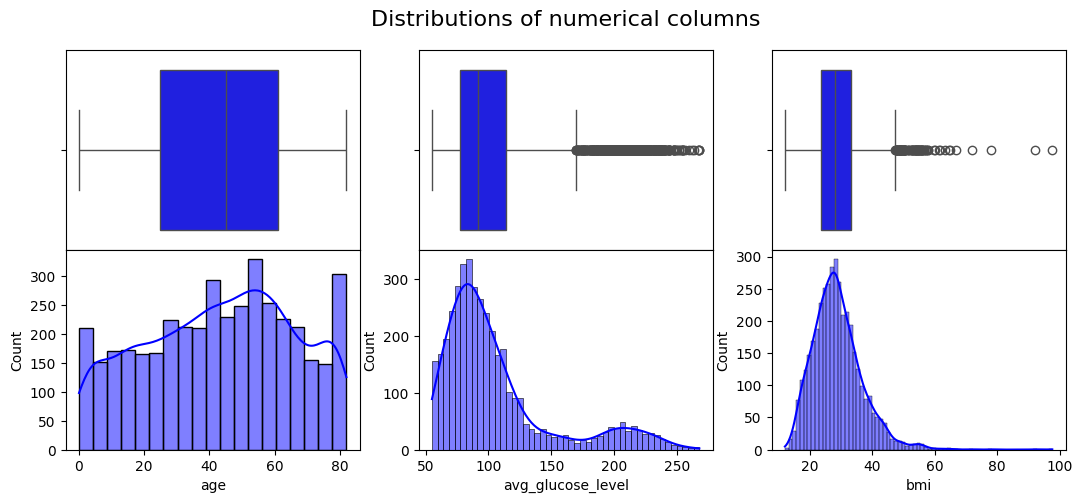

In [17]:
helper_functions.hist_box_num_binary(train_set, num_columns,
                                     title="Distributions of numerical columns", 
                                     figsize=(10, 4))

We have a lot of patients in each of the age group. There are more of between 30 and 65 years old. However, the difference in number of people between different ages is not big. 

Most people have normal average glucose levels around 80-110 mg/dL, which is typical for healthy individuals. However, our distribution is right-skewed, suggesting that there are many patients with high glucose levels, representing individuals with prediabetes and diabetes. Additionally, our distribution is bimodal, with a local peak around 210 mg/dL, indicating a significant subgroup of individuals with very high glucose levels.

A lot of people have high bmi values(around 25-35), which indicates overweight. Also, we have significant portion of those who can be classified obese and extreme obese. Additionally, the distribution can be classified as bimodal, because of a local peak around 55. There are patients with > 70 bmi. These are extreme outliers. Let's look at them more closely

In [18]:
extreme_bmi = train_set[train_set["bmi"] > 70]
extreme_bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0


We see that 3 out of 4 patients have hypertension. The patient without hypertension, has huge average glucose level(210). After analyzing it, we conclude that these are reasonable values for these patients and we will preserve them for now.

**Check the distributions of features for rows with missing bmi**

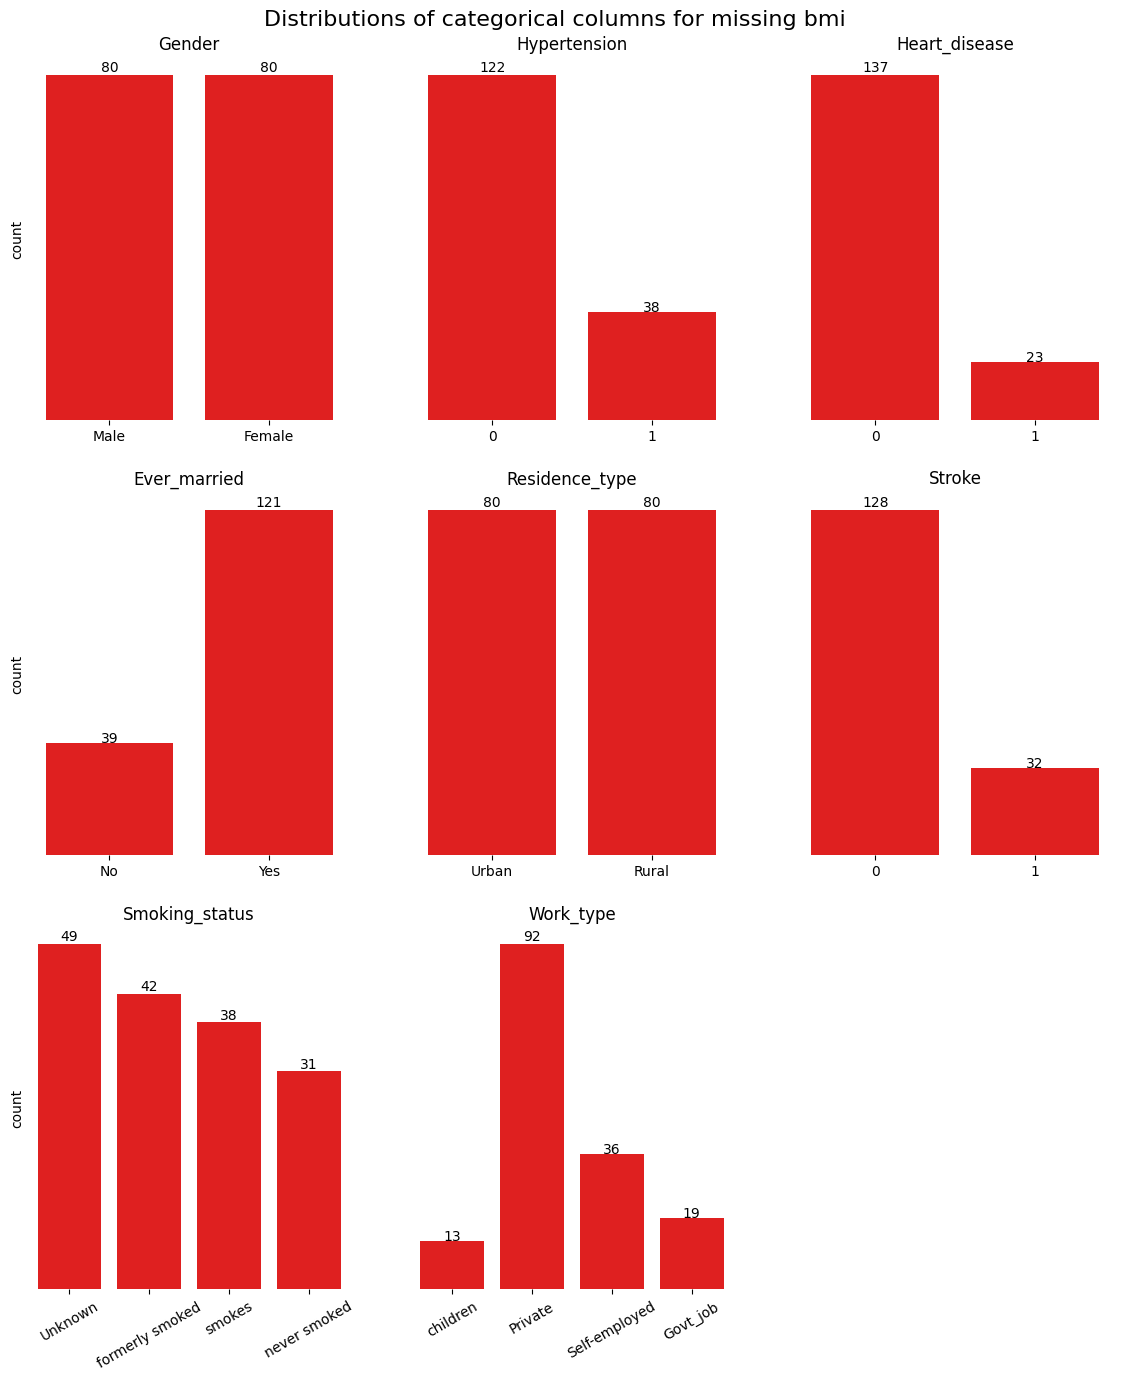

In [19]:
missing_bmi_train = train_set[train_set["bmi"].isnull()]
helper_functions.plot_cat_columns(missing_bmi_train, cat_columns, 
                                  "Distributions of categorical columns"
                                  " for missing bmi", figsize=(14, 16))

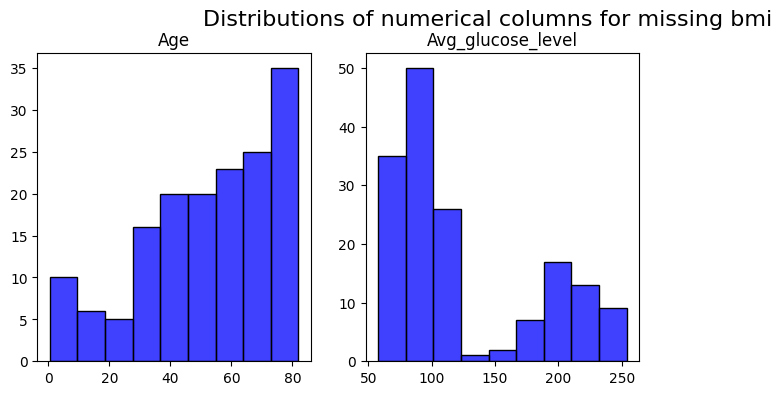

In [20]:
helper_functions.plot_numeric_col(missing_bmi_train, num_columns[:-1],
                                  "Distributions of numerical columns"
                                  " for missing bmi", (12, 4))

For patients with missing body mass index, there doesn't seem to be any pattern. The data is not missing for only some specific group of people. Therefore, we consider this data to be missing completely at random. Later, we will use imputation to fill in these missing values.

**Check the distributions of features for rows with missing smoking_status**

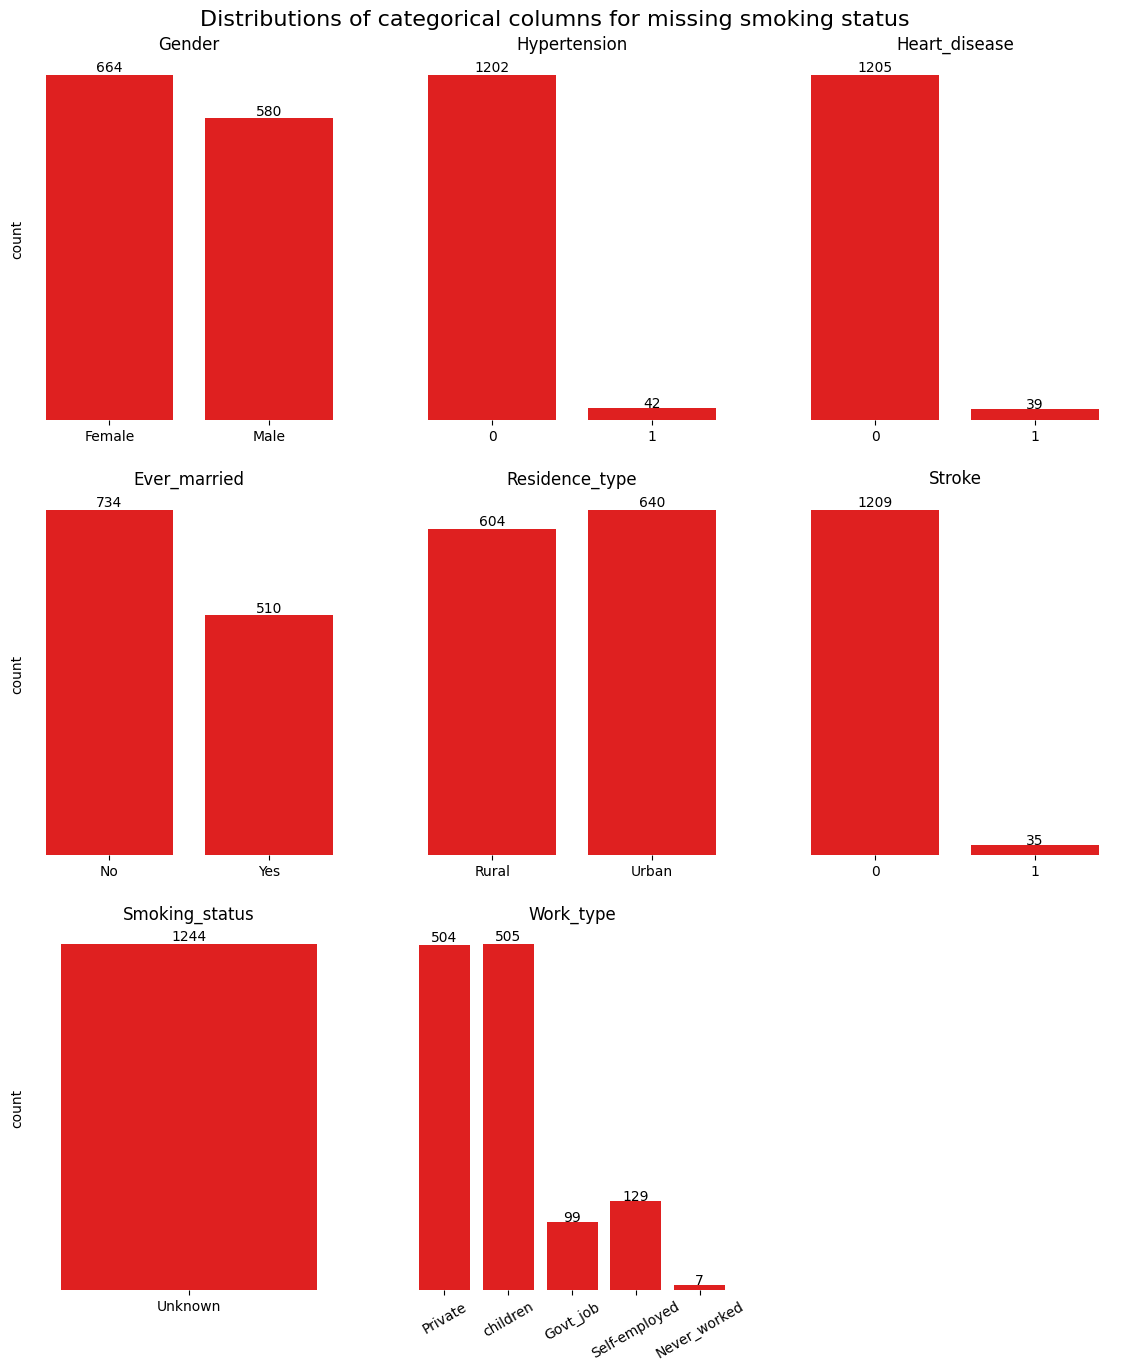

In [21]:
missing_smoking = train_set[train_set["smoking_status"] == "Unknown"]
helper_functions.plot_cat_columns(missing_smoking, cat_columns, 
                                  "Distributions of categorical columns"
                                  " for missing smoking status", figsize=(14, 16))

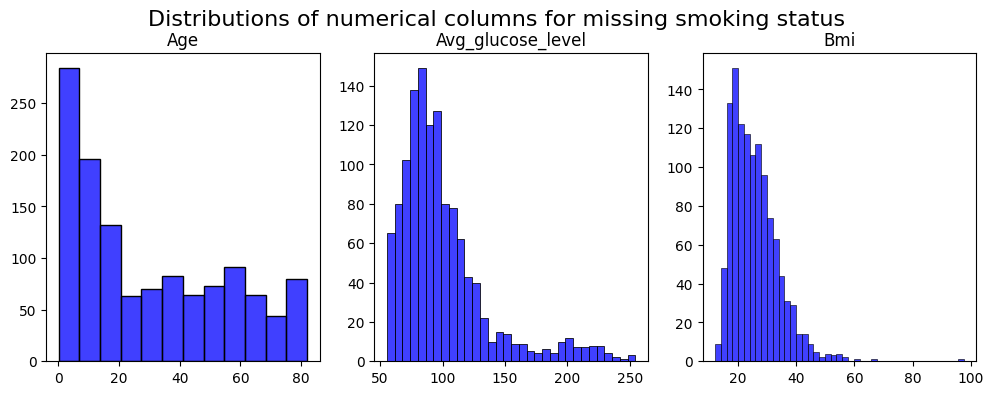

In [22]:
helper_functions.plot_numeric_col(missing_smoking, num_columns,
                                  "Distributions of numerical columns"
                                  " for missing smoking status", (12, 4))

Patients with missing smoking status tend to be younger. There are a lot of children. Therefore, these missing values for children could mean "never smoked". 

**Relationships between the target variable and the predictor variables**

First of all, we will:
   * Plot the distributions of each binary variable for group of patients who had and haven't had stroke
   * Conduct a hypothesis test for each variable to assess the association.

**Null hypothesis**: There is no significant association between the binary variable and the stroke variable

**Alternative hypothesis**: There is a significant association between the binary variable and the stroke variable

**Significance level**: 5%

We will conduct chi-square test of independence. Before doing that, let's check whether the assumptions are met:
   * Although the Kaggle dataset does not explicitly state the sampling method used, we will assume that the data was obtained through Simple Random Sampling (SRS) for the purposes of our project.
   *  Assuming that Simple Random Sampling (SRS) was employed, the chi-square test of independence relies on the assumption that observations are independent. However, it is important to note that our dataset includes individuals who may be family members. This introduces the possibility that the assumption of independence could be violated, as family members' outcomes might be correlated. Despite this potential issue, we suggest proceeding with the chi-square test due to the lack of explicit data identifying family relationships.
   * The expected frequency count in each cell of the contingency table should be at least 5. For each test, we will check it separately.

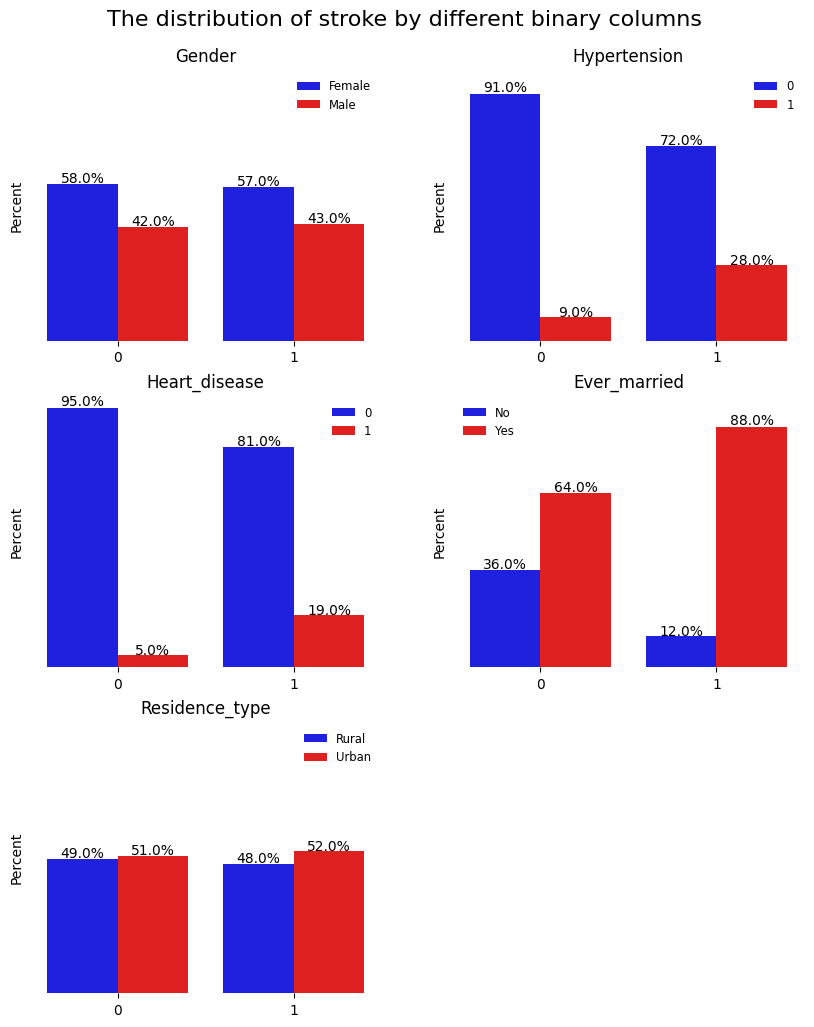

In [23]:
fig = plt.figure(figsize=(10, 12))
plt.suptitle("The distribution of stroke by different binary columns", 
             fontsize=16, y=0.93)
binary_columns = ["gender", "hypertension",
                 "heart_disease", "ever_married",
                 "Residence_type"]

# create a dataset, where the tests results will be stored
test_res_df = pd.DataFrame(index=binary_columns, 
                           columns=["chi2", "p"])

for i, column in enumerate(binary_columns):
    ax = fig.add_subplot(3, 2, i+1)
    count = pd.crosstab(train_set['stroke'], train_set[column])
    chi2, p, _, exp = chi2_contingency(count)
    
    # check if expected values < 5
    if (exp < 5).any():
        print(f"The contigency table with {column} has frequency count < 5")
        
    # store the results in the DataFrame
    test_res_df.loc[column, 'chi2'] = chi2
    test_res_df.loc[column, 'p'] = p
    
    
    count = count.apply(lambda x: x / x.sum(), axis=1).fillna(0)
    count = count.stack().reset_index()
    sns.barplot(x="stroke", y=0, 
                hue=column, data=count,
                palette=["blue", "red"])
    ax.set_ylabel("Percent")
    helper_functions.customize_bar(axes=ax, position="v", 
                                   values_font=10, pct=True)
    ax.set_xlabel("")
    ax.set_title(column.capitalize(), fontsize=12)
    ax.set_ylim(0, 1)
    ax.legend(title="", fontsize='small', 
              loc="best", edgecolor="white")

In [24]:
test_res_df

,chi2,p
gender,0.055834,0.813206
hypertension,75.008346,0.0
heart_disease,77.446032,0.0
ever_married,48.445445,0.0
Residence_type,0.160791,0.688429


There is no significant difference in the distribution of the **gender** variable between individuals who have had a stroke and those who haven’t. The chi-square test resulted in a p-value of approximately 0.8, indicating that gender is not significantly associated with stroke occurrence.

Similarly, the distribution of the **residence type** variable is almost identical between the stroke and non-stroke groups. The chi-square test yielded a p-value of around 0.7, suggesting no significant association between residence type and stroke.

In contrast, three other binary variables demonstrated statistically significant associations with stroke, with p-values very close to 0. This is expected for variables such as **heart disease** and **hypertension**, which are well-established risk factors for stroke. However, the association between the **ever_married** status and stroke is noteworthy. The bar plot reveals that 88% of individuals who have experienced a stroke have been married, compared to 64% of those who have not had a stroke. This discrepancy highlights an interesting trend, suggesting that being married might be associated with an increased likelihood of having had a stroke. However, in further part of EDA, we will dig more into relationships between different features and try to identify some confounding variables that could influence this relationship.

Now, let's analyze two other categorical variables:
   * work_type
   * smoking_status

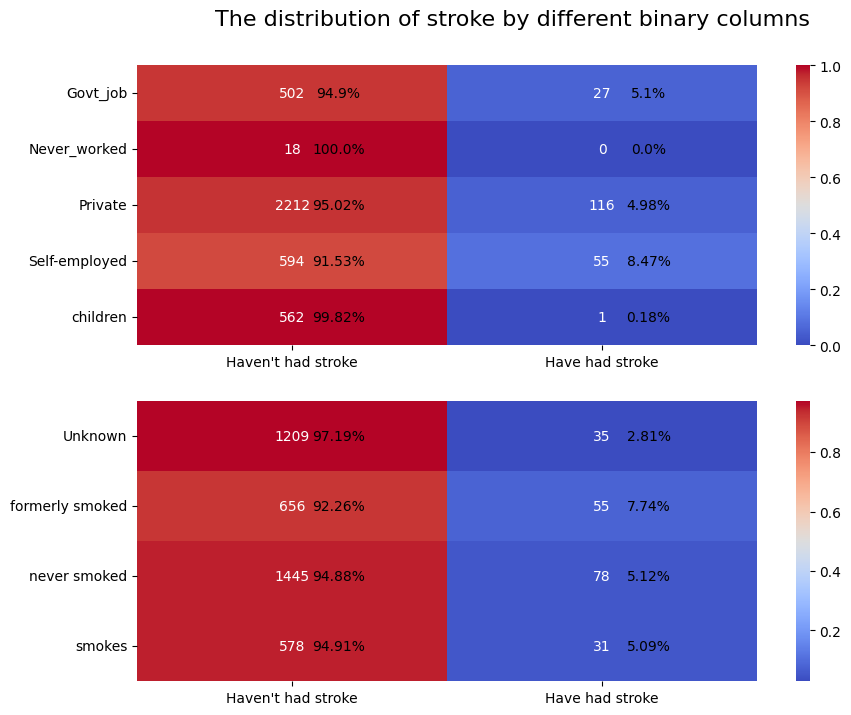

In [25]:
fig = plt.figure(figsize=(10, 8))
plt.suptitle("The distribution of stroke by different binary columns", 
             fontsize=16, y=0.95)
non_bin_cat_columns = ["work_type", "smoking_status"]

# create a dataset, where the tests results will be stored
test_res_df = pd.DataFrame(index=non_bin_cat_columns, 
                           columns=["chi2", "p"])

for i, column in enumerate(non_bin_cat_columns):
    ax = fig.add_subplot(2, 1, i+1)
    count = pd.crosstab(train_set[column], train_set["stroke"])
    
    count_pct = count.apply(lambda x: x / x.sum(), axis=1).fillna(0)
    heatmap = sns.heatmap(count_pct, cmap="coolwarm", annot=count, fmt=".0f")
    for i in range(count_pct.shape[0]):
        for j in range(count_pct.shape[1]):
            heatmap.text(j + 0.65, i + 0.5, 
                         f'{round(count_pct.iloc[i, j] * 100, 2)}%', 
                         color='black', ha='center', va='center')
    ax.set_ylabel("")
    ax.set_xticklabels(["Haven't had stroke", "Have had stroke"])
    ax.set_xlabel("")

In general, the percentages of people who have had a stroke versus those who have not appear similar across different work_type categories. However, individuals classified as self-employed stand out, with nearly 9% of them having experienced a stroke. Additionally, there is only one recorded case of a child having a stroke.

A similar pattern is observed with the smoking_status variable. Although overall stroke prevalence seems consistent across different smoking categories, former smokers exhibit a higher incidence of stroke. Conversely, there appears to be no significant difference in stroke rates between those who have never smoked and those who currently smoke.

**Relationship between numeric columns and the target variable**

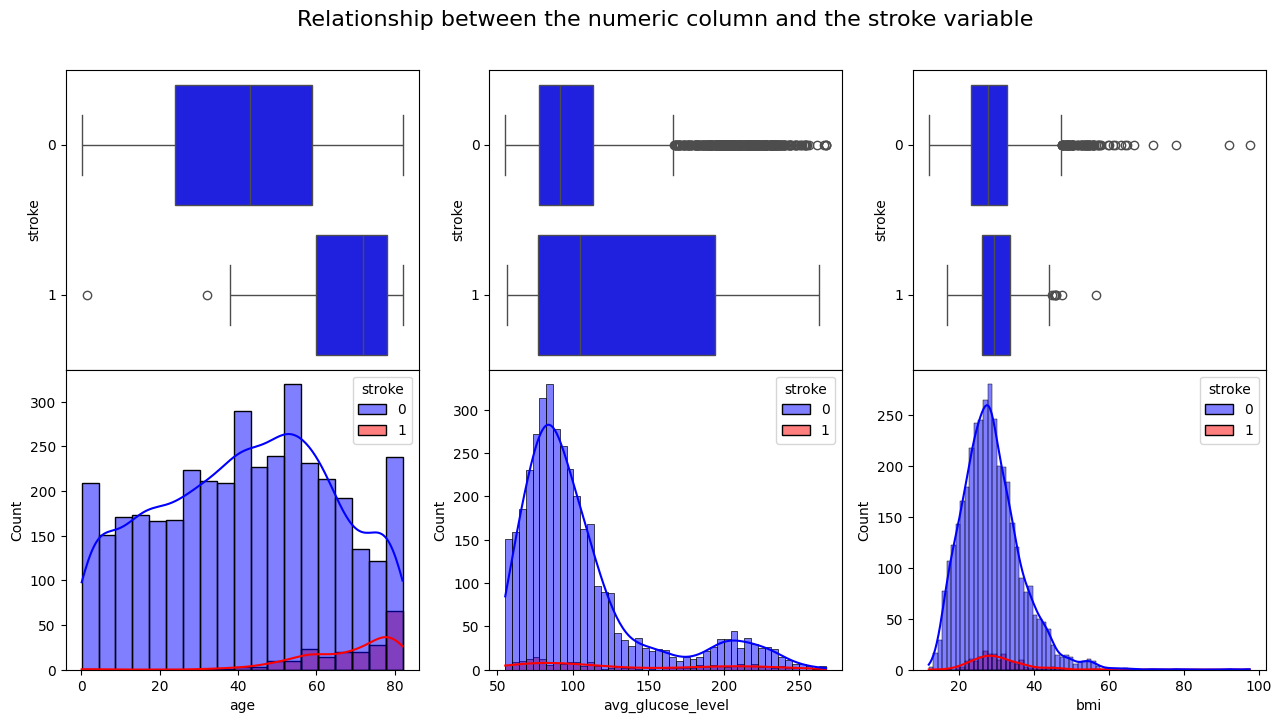

In [26]:
helper_functions.hist_box_num_binary(train_set, num_columns, hue="stroke", 
                                     title="Relationship between the numeric column"
                                     " and the stroke variable", figsize=(12, 6))

There is a notable association between age and the stroke column. Individuals who have had a stroke tend to be older, with the highest incidence observed among those close to 80 years old.

Additionally, people who have had a stroke generally have higher average glucose levels. The distribution of glucose levels for stroke patients appears more uniform, in contrast to the normal distribution observed in individuals who have not had a stroke.

There seems to be only minor difference between bmi of people who have had and haven't had stroke. Additionaly, all people with extreme bmi levels haven't had stoke.

Now, let's conduct Welch's t-test comparing means of our 3 numeric variables:

**Null hypothesis**: The mean of the variable of people who have had stroke is not different from the average age of people who haven't had stroke.

**Alternative hypothesis**: There is difference in average of the variable between people who have had stroke and those who haven't had.

**Significance level**: 0.05

Assumption of normality: the variables don't follow normal distribution. However, as we see below, the samples sizes are big enough to applly Central Limit Theorem.

In [27]:
num_stroke = train_set[train_set["stroke"] == 1][num_columns].dropna()
num_no_stroke = train_set[train_set["stroke"] == 0][num_columns].dropna()
print(f"Stroke sample size: {len(num_stroke)}")
print(f"No stroke sample size: {len(num_no_stroke)}")
for i, column in enumerate(num_columns):
    stroke_group = num_stroke[column]
    no_stroke_group = num_no_stroke[column]
    t_stat, p_value = stats.ttest_ind(stroke_group, 
                                      no_stroke_group, 
                                      equal_var=False)
    print("-----------------------------------------------------")
    print(column)
    print(f"Mean of the people with stroke: {round(stroke_group.mean(), 2)}, "
         f"mean of the people without stroke: {round(no_stroke_group.mean(), 2)}")
    print(f"p_value: {p_value}, t_statistic: {t_stat}")

Stroke sample size: 167
No stroke sample size: 3760
-----------------------------------------------------
age
Mean of the people with stroke: 68.69, mean of the people without stroke: 41.64
p_value: 3.506815076972791e-76, t_statistic: 28.227623834718198
-----------------------------------------------------
avg_glucose_level
Mean of the people with stroke: 134.45, mean of the people without stroke: 104.07
p_value: 2.930619589803698e-09, t_statistic: 6.26064693885111
-----------------------------------------------------
bmi
Mean of the people with stroke: 30.26, mean of the people without stroke: 28.79
p_value: 0.004429382454412425, t_statistic: 2.8803647518602182


All three tests have yielded statistically significant results. There is statistically significant difference in mean age between two groups. People, who have experienced stroke, tend to be way older. In addition, their glucose level and bmi are significantly higher. Though, the difference in bmi doesn't seem to be that big compared to age.

**Relationships between predictors**

**What is the differnce between age, bmi, avg_glucose_level for male and female patients?**

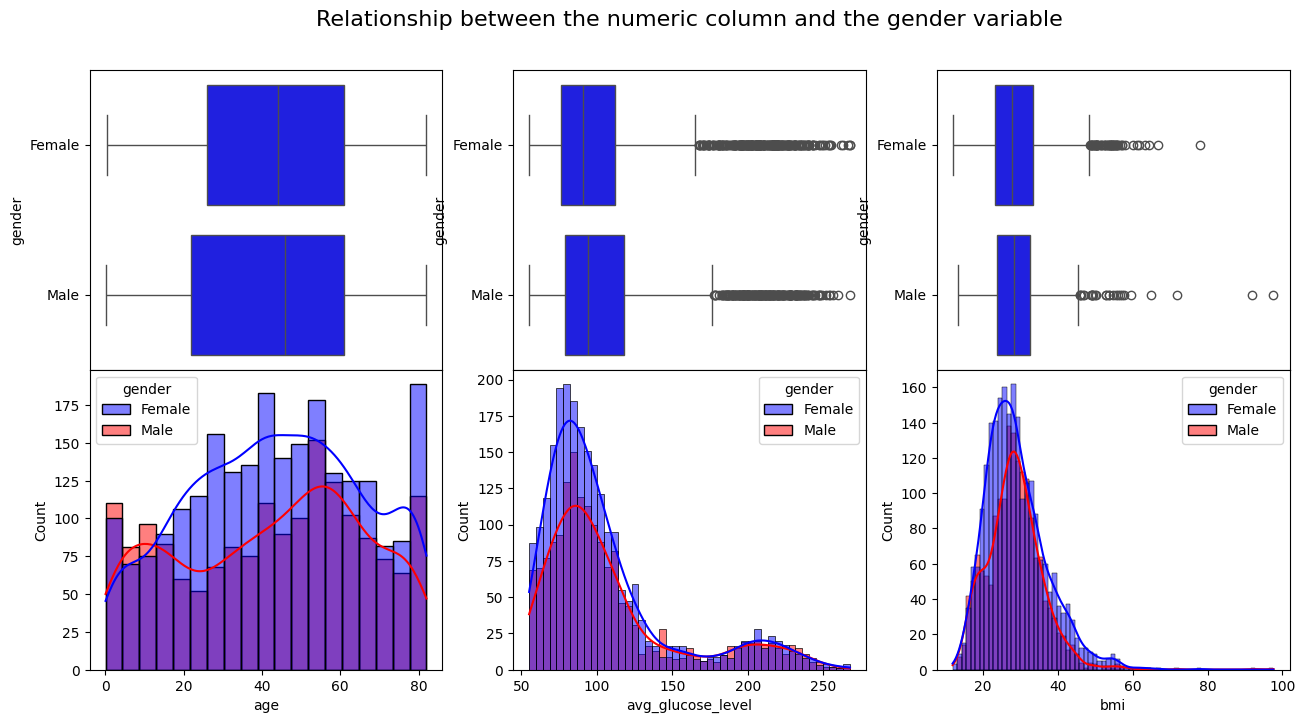

In [28]:
helper_functions.hist_box_num_binary(train_set, num_columns, hue="gender", 
                                     title="Relationship between the numeric column"
                                     " and the gender variable", figsize=(12, 6))

There seems to be no difference between gender and numeric columns in our datasets. The distributions of age, average glucose level and body masss index are very similar for both male and female.

**What is the difference in hypertension, heart_disease, ever_married between male and female?**

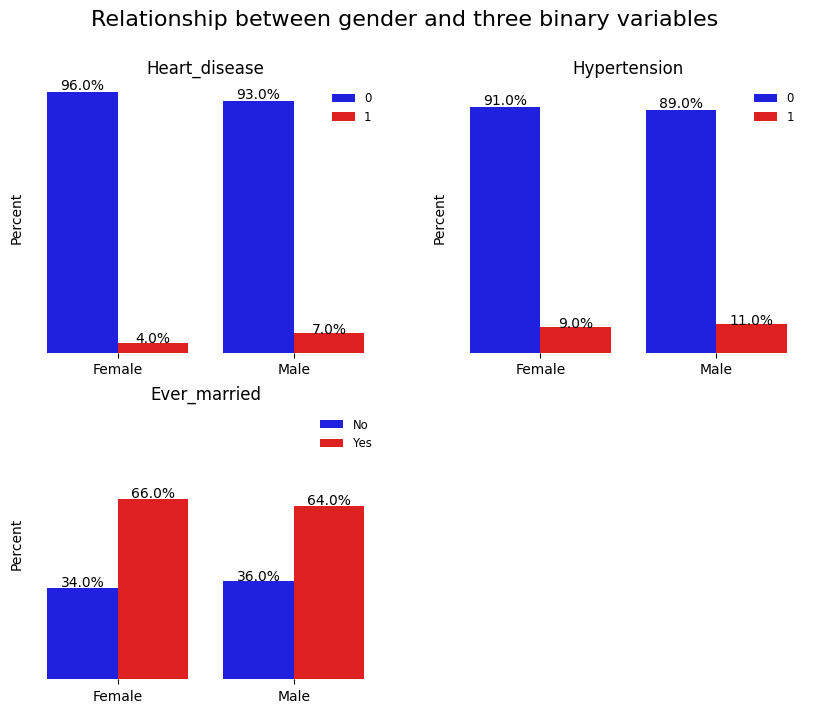

In [29]:
fig = plt.figure(figsize=(10, 12))
for i, column in enumerate(["heart_disease", "hypertension",
                           "ever_married"]):
    ax = fig.add_subplot(3, 2, i+1)
    count = pd.crosstab(train_set['gender'], train_set[column])
    count = count.apply(lambda x: x / x.sum(), axis=1).fillna(0)
    count = count.stack().reset_index()
    sns.barplot(x="gender", y=0, 
                hue=column, data=count,
                palette=["blue", "red"])
    ax.set_ylabel("Percent")
    helper_functions.customize_bar(axes=ax, position="v", 
                                   values_font=10, pct=True)
    ax.set_xlabel("")
    ax.set_title(column.capitalize(), fontsize=12)
    ax.set_ylim(0, 1)
    ax.legend(title="", fontsize='small', 
              loc="best", edgecolor="white")
plt.suptitle("Relationship between gender and three binary variables",
            fontsize=16, y=0.94);

Men can have heart_disease and hypertension a little bit more often. However, the difference between married type is absent

**What is the difference in age for people with hypertension and heart_disease?**

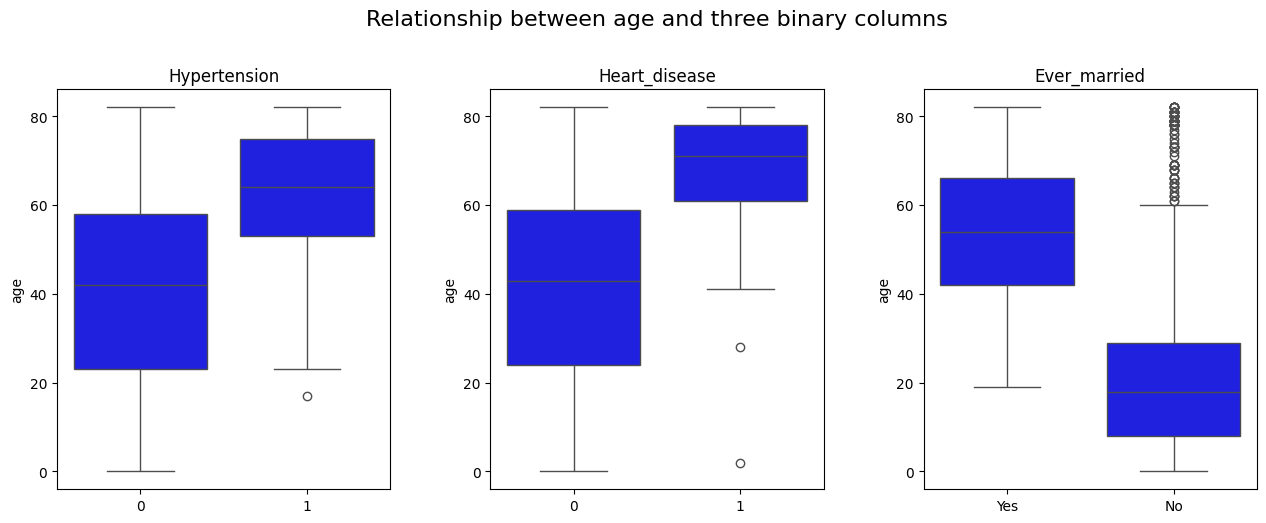

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
plt.subplots_adjust(left=0, right=1,
                    top=1, bottom=0, wspace=0.3, hspace=0)
plt.suptitle("Relationship between age"
             " and three binary columns", fontsize=16, y=1.2)
for i, column in enumerate(["hypertension", "heart_disease", "ever_married"]):
    ax[i].set_title(column.capitalize())
    sns.boxplot(x=column, data=train_set, y="age", 
                ax=ax[i], orient="v", color="blue")
    ax[i].set_xlabel("")

What we see here is that odler people have hypertension, heart disease more often. In additon, there seems to be big difference in age between ever_married column. This could explain us the above pattern that people who have been married had stroke more often.

To understand more relationship between above predictors and the target variable, I propose to do the following: discretize age variable into bins: [0, 40, 50, 60, 70, 80]. For each age group, compare chances of stroke for people with and without hypertension, heart disease.

In [31]:
bins = [0, 40, 50, 60, 70, 80,  90]
train_set["Age_binned"] = pd.cut(train_set['age'], bins=bins)

Check percent of people with stroke in each age group

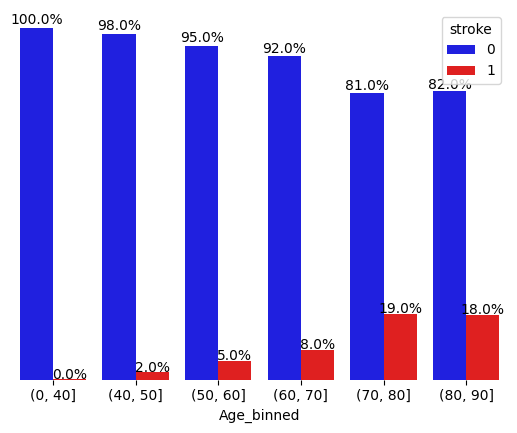

In [32]:
age_group_stroke = pd.crosstab(train_set["Age_binned"], train_set["stroke"])
age_group_stroke = (age_group_stroke.apply(lambda x: x / x.sum(), axis=1)
                    .stack().reset_index())
ax = sns.barplot(data=age_group_stroke, x="Age_binned", y=0, 
                 hue="stroke", palette=["blue", "red"])
helper_functions.customize_bar(position="v", axes=ax, pct=True, values_font=10)
ax.set_ylabel("");

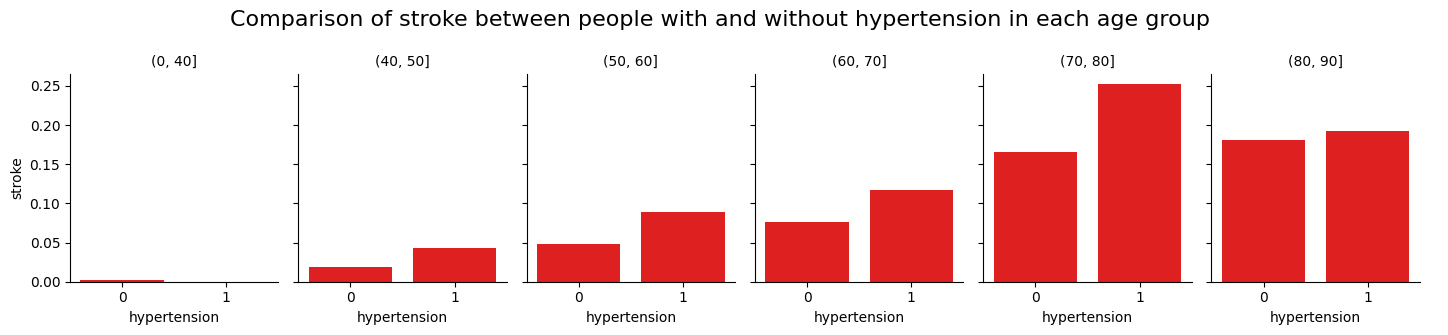

In [33]:
g = sns.catplot(data=train_set, col="Age_binned", 
                x="hypertension", y="stroke", kind="bar",
                errorbar=None, height=3, aspect=4/5, color="red")
g.set_titles("{col_name}")
g.fig.suptitle("Comparison of stroke between people"
               " with and without hypertension in"
               " each age group", y=1.1, fontsize=16);

Here we see that even in similar age groups, people with hypertension have a higher chance of a stroke.

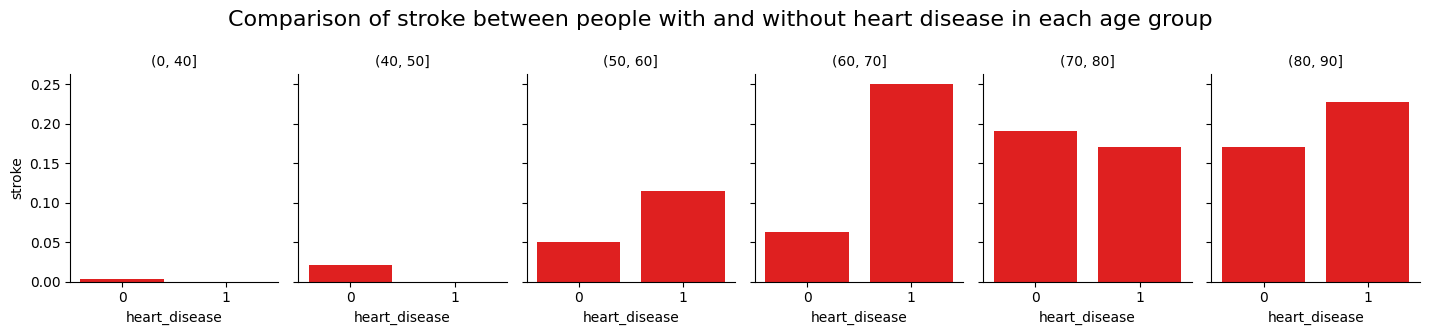

In [34]:
g = sns.catplot(data=train_set, col="Age_binned", 
                x="heart_disease", y="stroke", kind="bar",
                errorbar=None, height=3, aspect=4/5, color="red")
g.set_titles("{col_name}")
g.fig.suptitle("Comparison of stroke between people"
               " with and without heart disease in"
               " each age group", y=1.1, fontsize=16);

The situation with the heart_disease column is quite similar. However, a small number of individuals under 50 who have had a stroke do not have heart disease. Additionally, the age group with the highest percentage of stroke cases also shows a greater number of individuals with stroke who do not have heart disease.

**What is the distribution of ever_married column in each age_group**

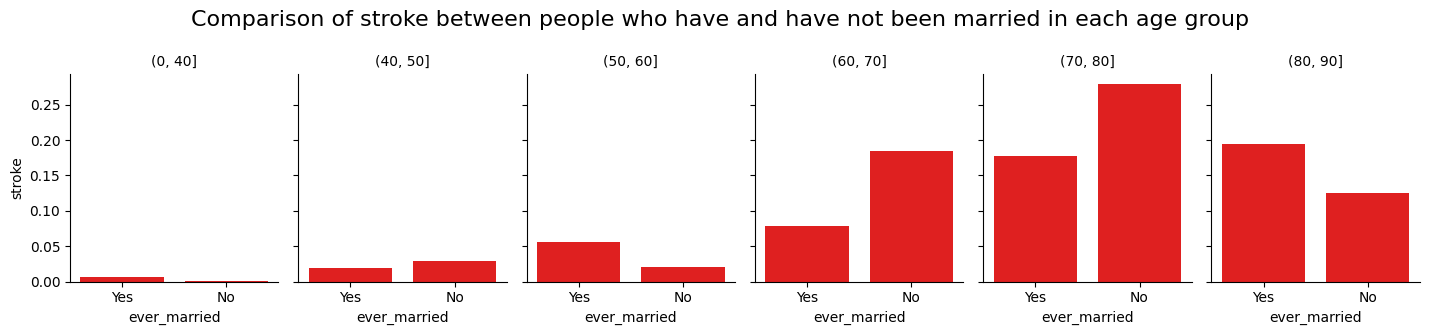

In [35]:
g = sns.catplot(data=train_set, col="Age_binned", 
                x="ever_married", y="stroke", kind="bar",
                errorbar=None, height=3, aspect=4/5, color="red")
g.set_titles("{col_name}")
g.fig.suptitle("Comparison of stroke between people"
               " who have and have not been married in"
               " each age group", y=1.1, fontsize=16);

We observe that in certain age groups, a significantly higher number of individuals who have never been married have experienced a stroke. Conversely, in other age groups, the trend is reversed, though the difference is less pronounced.

**Relationship between heart_disease and hypertension**

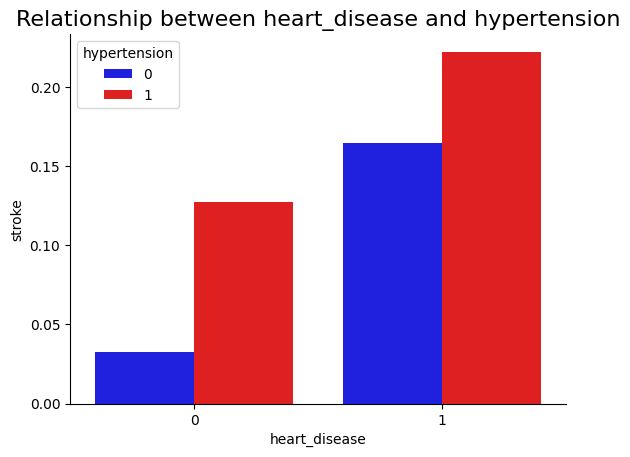

In [36]:
g = sns.barplot(x="heart_disease", y="stroke", hue="hypertension", 
                errorbar=None, data=train_set, palette=["blue", "red"])
g.set_title("Relationship between heart_disease and hypertension", fontsize=16)
sns.despine()

Unsurprisingly, individuals with both hypertension and heart disease are at the highest risk of having a stroke. Those with heart disease but without hypertension are at a higher risk than those with hypertension but without heart disease.

**Is there a correlation between age and average glucose level, bmi?**

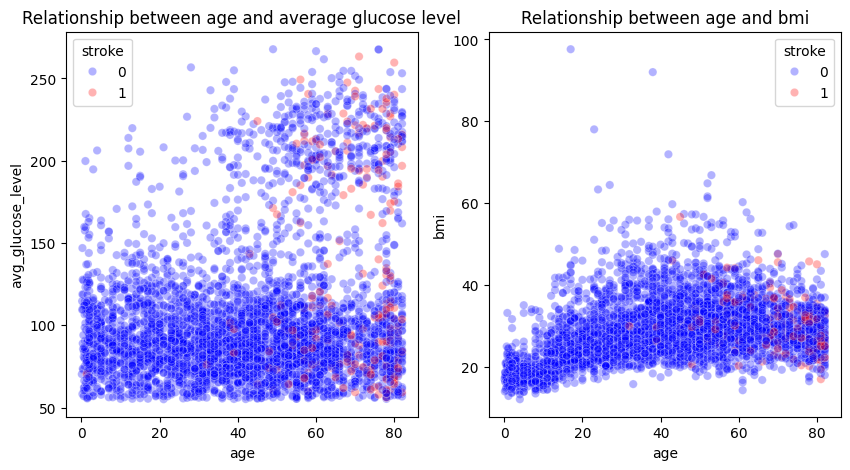

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=train_set, x="age", y="avg_glucose_level", 
                hue="stroke", alpha=0.3, ax=ax[0], palette=["blue", "red"])
ax[0].set_title("Relationship between age and average glucose level")

sns.scatterplot(data=train_set, x="age", y="bmi", 
                hue="stroke", alpha=0.3, ax=ax[1], palette=["blue", "red"])
ax[1].set_title("Relationship between age and bmi");

Older people have a little bit higher average glucose level. What has to be noted is that only older people(>40 years old) had stroke who had high average glucose level.

Regarding body mass index, we see that it's the highest for people between 40 and 60 years old. Again, regardless of the value of bmi, older people tend to have stroke more often.

Above plots indicate to us that age seems to have the most influence on our target variable. Other variables that had statistically significant results with the stroke variable may not have such big influence on this variable for people of the same age. 

**Is there a correlation between bmi and average glucose level?**

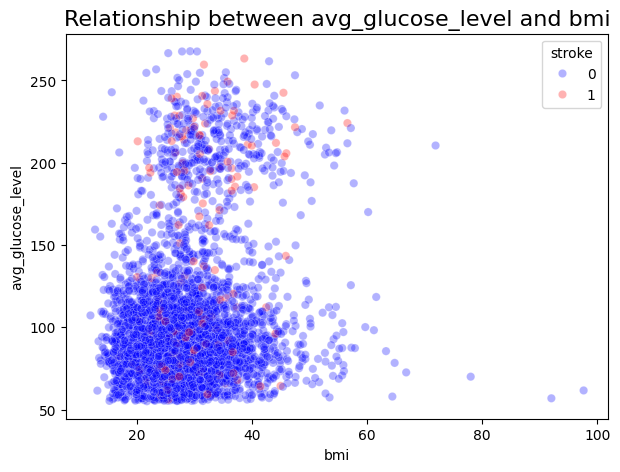

In [38]:
fig = plt.figure(figsize=(7, 5))
plt.title("Relationship between avg_glucose_level and bmi", fontsize=16)
sns.scatterplot(data=train_set, x="bmi", y="avg_glucose_level", 
                hue="stroke", alpha=0.3, palette=["blue", "red"]);

People with higher glucose level, tend to have a bit higher bmi. Additionally, these people have higher chances of a stroke 

**Difference in type of work for people with hypertension and heart_disease?**

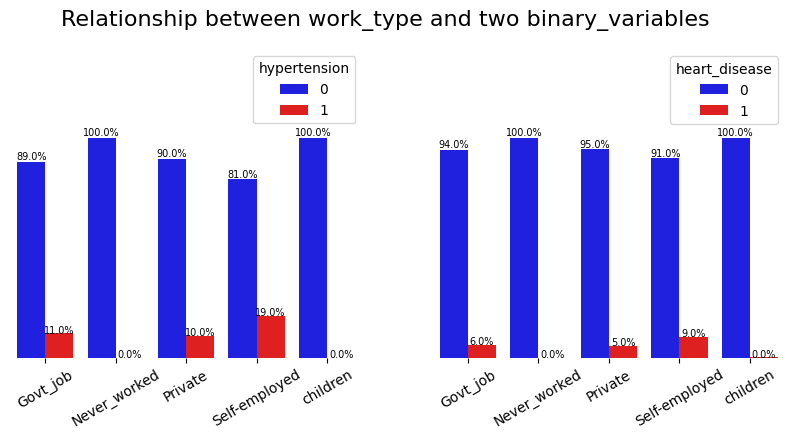

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle("Relationship between work_type and two binary_variables",
            fontsize=16)
for i, column in enumerate(["hypertension", "heart_disease"]):
    count = pd.crosstab(train_set["work_type"], train_set[column])
    count_pct = count.apply(lambda x: x / x.sum(), axis=1).fillna(0)
    count_pct = count_pct.stack().reset_index()
    sns.barplot(x="work_type", y=0, hue=column, 
                data=count_pct, ax=ax[i], palette=["blue", "red"])
    helper_functions.customize_bar(position="v", axes=ax[i], 
                                   pct=True, values_font=7)
    ax[i].set_xticks([0, 1, 2, 3, 4])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
    ax[i].set_ylabel("")
    ax[i].set_ylim(0, 1.4)
    ax[i].set_xlabel("")

We see that self-employed people seem to be more susceptible to hypertension and heart disease. 

**Association between hypertension, heart_disease with smoking_status**

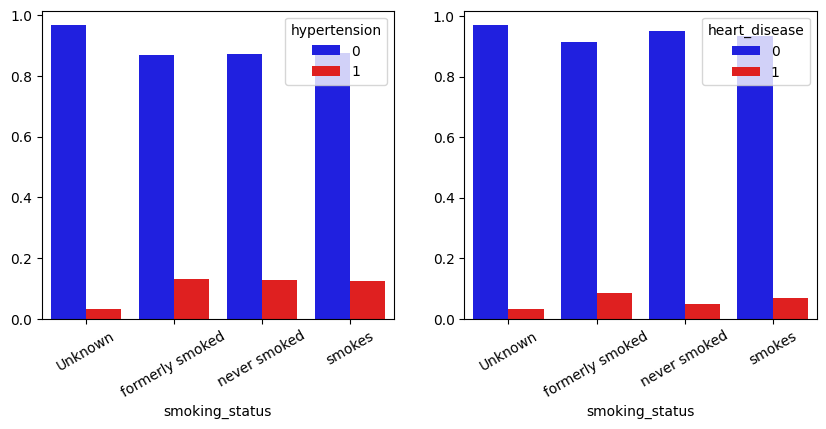

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for i, column in enumerate(["hypertension", "heart_disease"]):
    count = pd.crosstab(train_set["smoking_status"], train_set[column])
    count_pct = count.apply(lambda x: x / x.sum(), axis=1).fillna(0)
    count_pct = count_pct.stack().reset_index()
    sns.barplot(x="smoking_status", y=0, hue=column, 
                data=count_pct, ax=ax[i], palette=["blue", "red"])
    ax[i].set_xticks([0, 1, 2, 3])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
    ax[i].set_ylabel("")

Suprisingly, the frequency of hypertension and heart disease is pretty similar for people of different smoking status.

# Conclusion
* **Missing data**: Two columns have missing values: bmi and smoking_status. The data is missing completely at random for them. In the modeling part, we will come up with imputation techniques for these columns
* **Outliers**: Some patients have extremely high body mass index. However, these values are possible for a person to have. Therefore, we preserved them. These patients haven't had stroke issues
* **Imbalance**: The target variable is highly imbalanced. Only 5% of patients have had stroke. We will address this issue in the modeling part
* **Feature association**: 
    * Age: There is a strong association between age and the likelihood of having a stroke, with nearly all stroke cases occurring in individuals over 30 years old. This suggests that age is a significant predictor for stroke.
    * Hypertension and Heart Disease: The presence of hypertension and heart disease is associated with an increased likelihood of having a stroke.
    * BMI and Glucose Levels: Higher BMI and average glucose levels are correlated with an increased risk of stroke, although the association is not as strong. Some individuals with extreme values for these features have not experienced a stroke.
    * Gender and Smoking Status: There appears to be no significant association between gender and stroke incidence, nor between smoking habits and stroke. It is important to note that there are over 1,000 missing values for the smoking_status feature, which may impact the analysis

In [41]:
train_set.drop(columns="Age_binned", inplace=True)

In [42]:
train_set.to_csv("train_set.csv")
test_set.to_csv("test_set.csv")